In [1]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1) Data Pre-Processing

In [2]:
df_materials = pd.read_excel('Coef_Absorcion.xls', sheet_name='Materials')
df_categories = pd.read_excel('Coef_Absorcion.xls', sheet_name='Llegenda')

In [3]:
df_materials.head()

,description,63,125,250,500,1000,2000,4000,8000,a Max,material criteria,Unnamed: 11,character of absorption,Unnamed: 13,reference
0,"Fiberglass boards and blankets, 2,54 cm glass ...",NaN,0.08,0.25,0.65,0.85,0.80,0.75,NaN,0.85,1.0,NaN,2.0,NaN,Harris:Handbook of Acoustical Measurements and...
1,"Fiberglass boards and blankets, 5.1 cm glass w...",NaN,0.17,0.55,0.80,0.90,0.85,0.80,NaN,0.90,1.0,NaN,2.0,NaN,Harris:Handbook of Acoustical Measurements and...
2,"Fiberglass boards and blankets, 2.54 cm glass ...",NaN,0.15,0.55,0.80,0.90,0.85,0.80,NaN,0.90,1.0,NaN,2.0,NaN,Harris:Handbook of Acoustical Measurements and...
3,"Fiberglass boards and blankets, 5.1 cm fibergl...",NaN,0.33,0.79,0.99,0.91,0.76,0.64,NaN,0.99,1.0,NaN,2.0,NaN,Harris:Handbook of Acoustical Measurements and...
4,"Mineral spray-on materials, 1.27 cm mineral fiber",NaN,0.05,0.15,0.45,0.70,0.80,0.80,NaN,0.80,1.0,NaN,2.0,4.0,Harris:Handbook of Acoustical Measurements and...


In [4]:
# Column names
list(df_materials.columns.values)

['description',
 63,
 125,
 250,
 500,
 1000,
 2000,
 4000,
 8000,
 'a Max',
 'material criteria',
 'Unnamed: 11',
 'character of absorption',
 'Unnamed: 13',
 'reference ']

In [5]:
# Relevant columns
df_rel_mat = df_materials[[125, 250, 500, 1000, 2000, 4000, 'material criteria', 'character of absorption']]

In [6]:
# Material type
df_mat = df_materials[[125, 250, 500, 1000, 2000, 4000, 'material criteria']]
# Material character
df_mattype = df_materials[[125, 250, 500, 1000, 2000, 4000, 'character of absorption']]

In [7]:
#len(df_mat)
len(df_mattype)

1000

In [8]:
# Clean empty rows
df_mat = df_mat.dropna()
df_mattype = df_mattype.dropna()

In [9]:
len(df_mat)
len(df_mattype)

972

In [10]:
#df_mat.head()
df_mattype.head()

,125,250,500,1000,2000,4000,character of absorption
0,0.08,0.25,0.65,0.85,0.80,0.75,2.0
1,0.17,0.55,0.80,0.90,0.85,0.80,2.0
2,0.15,0.55,0.80,0.90,0.85,0.80,2.0
3,0.33,0.79,0.99,0.91,0.76,0.64,2.0
4,0.05,0.15,0.45,0.70,0.80,0.80,2.0


In [11]:
#df_mat['material criteria'] = df_mat['material criteria'] - 1
df_mattype['character of absorption'] = df_mattype['character of absorption'] - 1

In [12]:
df_mattype.head()

,125,250,500,1000,2000,4000,character of absorption
0,0.08,0.25,0.65,0.85,0.80,0.75,1.0
1,0.17,0.55,0.80,0.90,0.85,0.80,1.0
2,0.15,0.55,0.80,0.90,0.85,0.80,1.0
3,0.33,0.79,0.99,0.91,0.76,0.64,1.0
4,0.05,0.15,0.45,0.70,0.80,0.80,1.0


In [13]:
#df_mat['material criteria'] = df_mat['material criteria'].astype(int)
df_mattype['character of absorption'] = df_mattype['character of absorption'].astype(int)

In [14]:
df_mattype.head()

,125,250,500,1000,2000,4000,character of absorption
0,0.08,0.25,0.65,0.85,0.80,0.75,1
1,0.17,0.55,0.80,0.90,0.85,0.80,1
2,0.15,0.55,0.80,0.90,0.85,0.80,1
3,0.33,0.79,0.99,0.91,0.76,0.64,1
4,0.05,0.15,0.45,0.70,0.80,0.80,1


# Model
class Model(nn.Module):
    def __init__(self, in_features=6, h1=12, h2=24, h3=86, h4=24, h5=18, out_features=12):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layers
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, h4)
        self.fc5 = nn.Linear(h4, h5)
        self.out = nn.Linear(h5, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.out(x)
        return x

In [15]:
class Model(nn.Module):
    def __init__(self, in_features=6, h1=9, h2=12, h3=9, out_features=5):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.fc3 = nn.Linear(h2, h3)  
        self.out = nn.Linear(h3, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)
        return x

In [24]:
# Test/train split
#X = df_mat.drop('material criteria',axis=1).values
#y = df_mat['material criteria'].values

X = df_mattype.drop('character of absorption',axis=1).values
y = df_mattype['character of absorption'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [25]:
# Dataloader
trainloader = DataLoader(X_train, batch_size=200, shuffle=True)
testloader = DataLoader(X_test, batch_size=200, shuffle=False)

In [26]:
# Initialize model
torch.manual_seed(10)
model = Model()

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

In [28]:
# Training
epochs = 10000
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%100 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.52022123
epoch: 101  loss: 0.71750277
epoch: 201  loss: 0.56513691
epoch: 301  loss: 0.45019281
epoch: 401  loss: 0.40953350
epoch: 501  loss: 0.39891234
epoch: 601  loss: 0.39201549
epoch: 701  loss: 0.38240376
epoch: 801  loss: 0.35828885
epoch: 901  loss: 0.30534494
epoch: 1001  loss: 0.27424946
epoch: 1101  loss: 0.26136345
epoch: 1201  loss: 0.25380781
epoch: 1301  loss: 0.24804792
epoch: 1401  loss: 0.24177741
epoch: 1501  loss: 0.23492303
epoch: 1601  loss: 0.22845545
epoch: 1701  loss: 0.22393186
epoch: 1801  loss: 0.21980342
epoch: 1901  loss: 0.21500771
epoch: 2001  loss: 0.21045676
epoch: 2101  loss: 0.20734625
epoch: 2201  loss: 0.20494124
epoch: 2301  loss: 0.20261744
epoch: 2401  loss: 0.19793582
epoch: 2501  loss: 0.19396132
epoch: 2601  loss: 0.18916704
epoch: 2701  loss: 0.18438895
epoch: 2801  loss: 0.17976508
epoch: 2901  loss: 0.17463845
epoch: 3001  loss: 0.17130893
epoch: 3101  loss: 0.16851126
epoch: 3201  loss: 0.16611274
epoch: 3301  loss: 0.

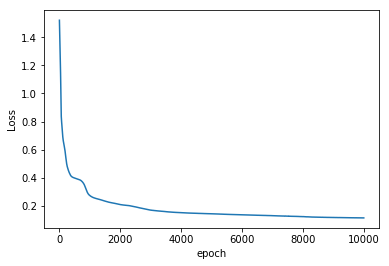

In [29]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [30]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.80618882


In [31]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        #print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')


176 out of 195 = 90.26% correct


In [32]:
# Guardo el modelo
torch.save(model.state_dict(), 'aislamiento.pt')

In [42]:
# aplico el modelo a un material nuevo
lana_vidrio_isover = torch.tensor([0.1, 0.3, 0.6, 0.93, 0.99, 0.98]) # panel PF 80 (25mm)
espuma_fonac = torch.tensor([0.11, 0.14, 0.36, 0.82, 0.90, 0.97]) # Fonac (35mm)
prueba = torch.tensor([0.7, 0.8, 0.5, 0.3, 0.2, 0.1])

In [43]:
with torch.no_grad():
    print(model(lana_vidrio_isover))
    print(model(espuma_fonac))
    print(model(prueba))

tensor([-47.2830,  25.3922, -12.4651,  19.3954,  -1.0552])
tensor([-41.2451,  18.9176,  -4.8874,  15.6087,  -0.6930])
tensor([ 32.7106,  17.5740, -32.3445, -31.4476, -65.4320])
